<a href="https://colab.research.google.com/github/oldistic/fishify/blob/machine-learning/fishify_model_v6_Rozi_10Desember.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


In [3]:


# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Definisikan path dataset
train_data_dir = '/content/drive/MyDrive/capstone_project/fishify/datasets/Roboflow Dataset/train'
valid_data_dir = '/content/drive/MyDrive/capstone_project/fishify/datasets/Roboflow Dataset/valid'
# Tentukan parameter-model
batch_size = 32
image_size = (224, 224)
epochs = 25

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Persiapkan data train
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Persiapkan data validation
valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 546 images belonging to 13 classes.
Found 52 images belonging to 13 classes.


In [7]:
class CustomEarlyStopping(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.95 and logs.get('accuracy') > 0.95:
            print("\nTraining is stopped as val_accuracy > 0.95, accuracy > 0.95")
            self.model.stop_training = True

In [16]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dropout(0.2),# Adding dropout with a dropout rate of 0.5 (adjust as needed)
    layers.Dense(13, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    callbacks=[CustomEarlyStopping()]
)

Epoch 1/25
17/17 [==============================] - 16s 794ms/step - loss: 2.3440 - accuracy: 0.2665 - val_loss: 1.3993 - val_accuracy: 0.7188
Epoch 2/25
17/17 [==============================] - 13s 791ms/step - loss: 1.2732 - accuracy: 0.6148 - val_loss: 1.0537 - val_accuracy: 0.7188
Epoch 3/25
17/17 [==============================] - 13s 785ms/step - loss: 0.9174 - accuracy: 0.7121 - val_loss: 0.6620 - val_accuracy: 0.8438
Epoch 4/25
17/17 [==============================] - 12s 713ms/step - loss: 0.6001 - accuracy: 0.8327 - val_loss: 0.4736 - val_accuracy: 0.8750
Epoch 5/25
17/17 [==============================] - 13s 790ms/step - loss: 0.4846 - accuracy: 0.8482 - val_loss: 0.2945 - val_accuracy: 0.9062
Epoch 6/25
17/17 [==============================] - 13s 835ms/step - loss: 0.3894 - accuracy: 0.8969 - val_loss: 0.3921 - val_accuracy: 0.9375
Epoch 7/25
17/17 [==============================] - 13s 787ms/step - loss: 0.3060 - accuracy: 0.9105 - val_loss: 0.4859 - val_accuracy: 0.9062

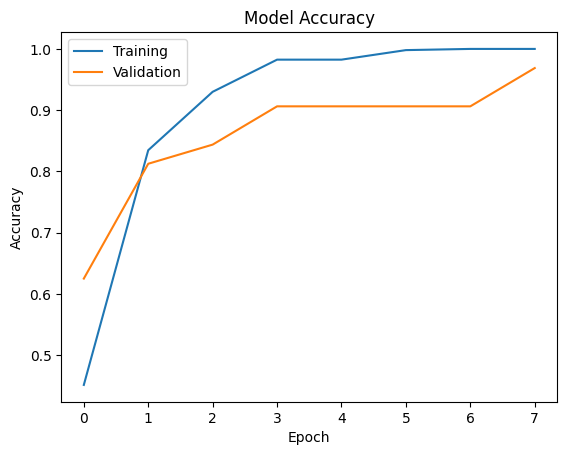

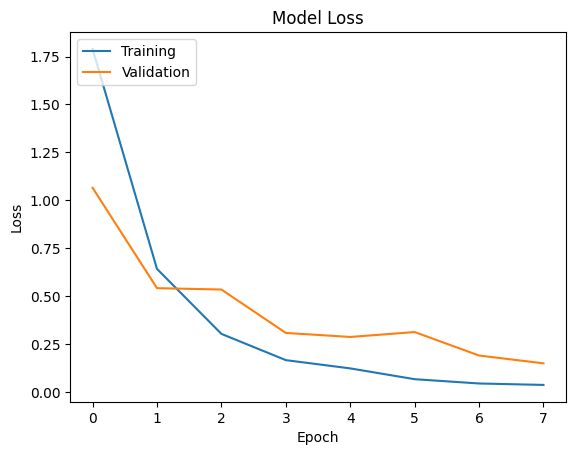

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# Plot grafik loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [13]:
# Simpan model
model.save('/content/drive/MyDrive/capstone_project/model/fishify_model_v6_rozi_10Desember.h5')